# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [DUBOUX Jean-Paul]([link](https://github.com/Eclil))
- [WANG Céline]([link](https://github.com/cessounette))

In [1]:
%load_ext autoreload
%autoreload 2

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [2]:
# your code
import numpy as np
import random

rng = np.random.default_rng(12345)
print(rng.random())

0.22733602246716966


2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

**Answer:**

In [3]:
# your code
import numpy as np

def brownian_motion(niter, x, step, rng):
    
    W = np.array(x) # We create W_k at step 0
    W_minus = np.array(x) # We create W_k-1
    
    list_walk = [W] # List of steps
    iter = 0
    
    intersect = np.zeros(2) # W*
    
    while(np.dot(W.T,W) <= 1 and iter < niter): # We update W_k as long as the points are in the circle or the number of iterations is below niter
        W_minus = W.copy() # W_k-1 -> W_k
        W = np.zeros(len(W))

        # W_k -> W_k+1
        W[0] = W_minus[0] + np.sqrt(step)*rng.normal(0,1)
        W[1] = W_minus[1] + np.sqrt(step)*rng.normal(0,1)
        
        list_walk.append(W) # We add the step k+1 to the list
        iter += 1
        

    if (np.dot(W.T,W) > 1): # We determine the exact coordinates of the intersection between the interpolation of the brownian motion and the circle surface
        
        A = (W[1]-W_minus[1])/(W[0]-W_minus[0]) # Determination of the line's gradient between the two last steps 
        B = W_minus[1] - W_minus[0]*A # Determination of the y value at the origin

        # We have two possible solutions for W*_x, considering the two last points position, we can take the exact one.
        if((W[0] <= (-A*B - np.sqrt(A**2 - B**2 + 1))/(1+ A**2) <= W_minus[0]) or (W_minus[0] <= (-A*B - np.sqrt(A**2 - B**2 + 1))/(1+ A**2) <= W[0])):
            
            intersect[0] = (-A*B - np.sqrt(A**2 - B**2 + 1))/(1+ A**2)

        else:
            intersect[0] = (-A*B + np.sqrt(A**2 - B**2 + 1))/(1+ A**2)
            
        intersect[1] = A*intersect[0] + B # Determination of W*_y

        list_walk.append(intersect)

    return np.array(list_walk), intersect
            
    

3. Diplay the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

Text(0.5, 1.0, 'Trajectory of a 2D brownian motion starting from (0.2,0.4)')

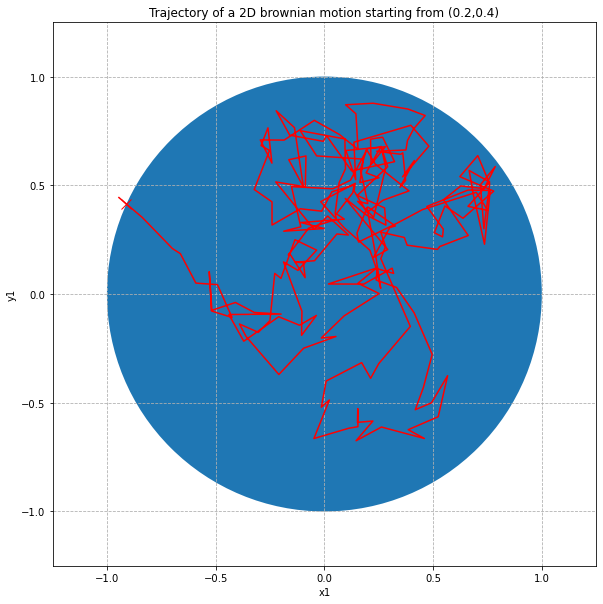

In [4]:
# your code
import matplotlib.pyplot as plt

circle = plt.Circle((0,0),1);
fig, ax = plt.subplots(figsize=(10,10));
plt.xlim(-1.25,1.25);
plt.ylim(-1.25,1.25);
plt.grid(linestyle = "--", zorder = 1);
ax.set_aspect(1);
ax.add_artist(circle);

list, w_star = brownian_motion(1000, (0.2,0.4), 1e-2, rng)

list = np.array(list);

plt.plot(list[:-1,0],list[:-1,1],0.1,color ='r');
plt.plot(w_star[0],w_star[1],10, markersize = 10, marker = 'x',color = 'r');
plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Trajectory of a 2D brownian motion starting from (0.2,0.4)')


4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

Text(0.5, 1.0, 'Trajectory of four 2D brownian motions starting from (0.2,0.4)')

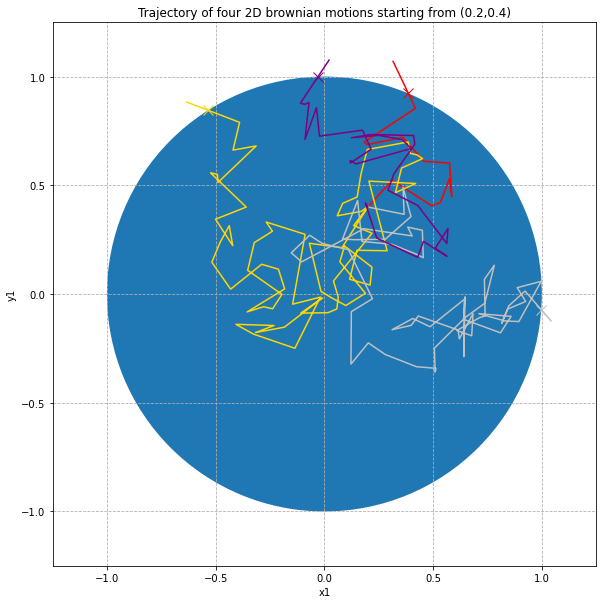

In [5]:
# your code
circle = plt.Circle((0,0),1);
fig, ax = plt.subplots(figsize=(10,10));
plt.xlim(-1.25,1.25);
plt.ylim(-1.25,1.25);
plt.grid(linestyle = "--", zorder = 1);
ax.set_aspect(1);
ax.add_artist(circle);

color = ['r','gold','silver','purple'];

for x in color:
    list, w_star = brownian_motion(1000, (0.2,0.4), 1e-2, rng)
    plt.plot(list[:-1,0],list[:-1,1],0.1,color = x);
    plt.plot(w_star[0],w_star[1],10, markersize = 10, marker = 'x',color = x)

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Trajectory of four 2D brownian motions starting from (0.2,0.4)')

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [6]:
# your code
def brownian_motion_M(niter, x, step, rng):
    
    W = np.array(x) # We create W_k at step 0
    W_minus = W.copy() # We create W_k-1
    
    list_walk = []
    list_walk.append(W) # List of steps
    iter = 0
    
    intersect = np.zeros(len(x)) # W*
    
    while(np.dot(W.T,W) <= 1 and iter < niter): # We update W_k as long as the points are in the circle or the number of iterations is below niter
        W_minus = W.copy() # W_k-1 -> W_k
        W = np.zeros(len(x))

        # W_k -> W_k+1
        for k in range(len(W)):  
            W[k] = W_minus[k] + np.sqrt(step)*rng.normal(0,1)

        iter += 1
        list_walk.append(W) # We add the step k+1 to the list

    if (np.dot(W.T,W) > 1):
        nW_minus = np.dot(W_minus.T,W_minus)
        nW = np.dot(W.T,W)

        # Interpolation between the two last steps' norms
        t = (1 - nW_minus)/(nW - nW_minus) 

        # Determination of a W* approx
        intersect = (1-t)*W_minus + t*W
        print(np.dot(intersect.T,intersect)) # We show how close the norm is to 1

        list_walk.append(intersect)

    return list_walk, intersect

# Example case
brownian_motion_M(1000, (0.2,0.4,0.2,0.1,0.7,0.1), 1e-2, rng)

0.9838731262927358


([array([0.2, 0.4, 0.2, 0.1, 0.7, 0.1]),
  array([0.24832553, 0.39081837, 0.38662996, 0.11124269, 0.70796156,
         0.06562188]),
  array([0.2182069 , 0.41635888, 0.35936242, 0.15455797, 0.71867836,
         0.12275203]),
  array([0.18162578, 0.39794918, 0.38532589, 0.16300537, 0.73030086,
         0.24137036]),
  array([0.07603692, 0.20541727, 0.45943229, 0.14044338, 0.86685797,
         0.23445355]),
  array([0.14675767, 0.33437028, 0.4097977 , 0.15555483, 0.77539547,
         0.23908626])],
 array([0.14675767, 0.33437028, 0.4097977 , 0.15555483, 0.77539547,
        0.23908626]))

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

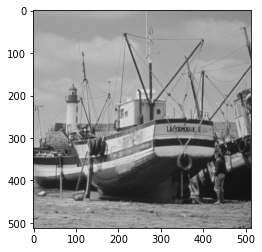

In [7]:
# your code
import matplotlib.image as mpimg
X = mpimg.imread('img/boat.png')
imgplot = plt.imshow(X, cmap='gray')
plt.show()

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

C:\Users\Jp190\AppData\Local\Temp/ipykernel_12532/1022098006.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  X = rgb2gray(X)


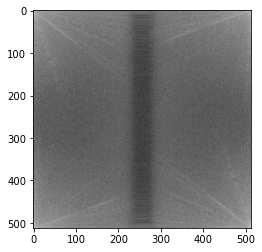

In [8]:
# your code
from skimage.color import *

X = rgb2gray(X)
X = np.array(X)

X_fourier = np.fft.fft2(X)
X_spectrum = np.abs(X_fourier)**2

plt.imshow(np.log(X_spectrum), cmap='gray')
plt.show()

a) The pixels associated with a null frequency are located in the image corners.

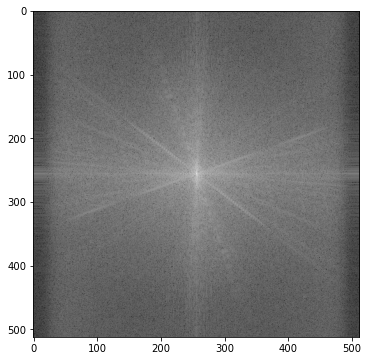

In [9]:
# b)
X_shifted_fourier = np.fft.ifftshift(X_fourier)
plt.figure(num=None, figsize=(8, 6))
plt.imshow(np.log(abs(X_shifted_fourier)**2), cmap='gray')

This time we can see that the pixel associated with a null frequency in in the middle of the picture

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [10]:
# your code

# a)
def ideal_lowpass_filter(X,fc):
    
    X = rgb2gray(X)
    X_np=np.array(X)

    # Center coordinates computation
    center = np.array([0,0])
    lenght, width = np.shape(X)
    
    center[0] = lenght//2
    center[1] = width//2

    # Plot of the original picture
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    imgplot = plt.imshow(X, cmap='gray')
    plt.title('Original picture')

    # Shifted fft of the picture
    X_fourier = np.fft.fftshift(np.fft.fft2(X_np))

    # Number of saved samples for each direction
    fc_x,fc_y= fc[0],fc[1]
    
    # Putting to 0 the unwanted frequency values (creating a window)
    
    X_fourier[: center[0] - int(fc_x/2), :] = 0
    X_fourier[ : ,  : center[1] - int(fc_y/2)] = 0
    X_fourier[center[0] + int(fc_x/2) : , : ] = 0
    X_fourier[:, center[1] + int(fc_y/2) : ] = 0

    """We could also create a transfer matrix, with 1 for the selected samples ans 0 outside of the "box" and then calculate the product between X and this matrix for something more 'instinctive' from a physical point of view.
    However, this implementation is faster.
    """

    #inverse fft
    X_fourier_inv = np.real(np.fft.ifft2(np.fft.ifftshift(X_fourier)))
    X_fourier_inv = np.maximum(0, np.minimum(X_fourier_inv, 255))

    #show the image 
    plt.subplot(1,2,2) 
    plt.title('Filtered picture (lowpass) with cutoff of ' + str(fc_x))
    imgplot_f_inv = plt.imshow(X_fourier_inv, cmap='gray')
    plt.show()
    

C:\Users\Jp190\AppData\Local\Temp/ipykernel_12532/1948815798.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  X = rgb2gray(X)


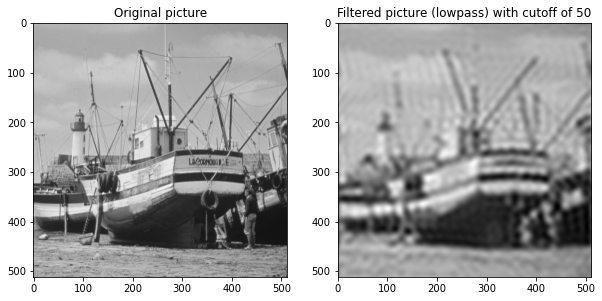

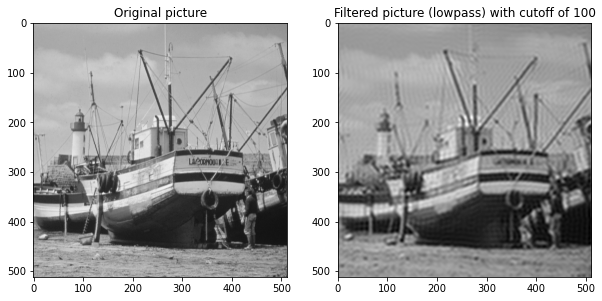

In [11]:
# b)
ideal_lowpass_filter(X,[50,50])

ideal_lowpass_filter(X,[100,100])

If we increment the cutoff value, the resulting picture appears more blurred.

We notice that the most frequencies we have left, the less the resulting picture appears blurred.
Which is quite logical since we keep more information.

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} =P_1^* \bigg( \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \bigg) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform and $P_1^*$ is a cropping operator (adjoint of $P_1$). 

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

**Answer:**

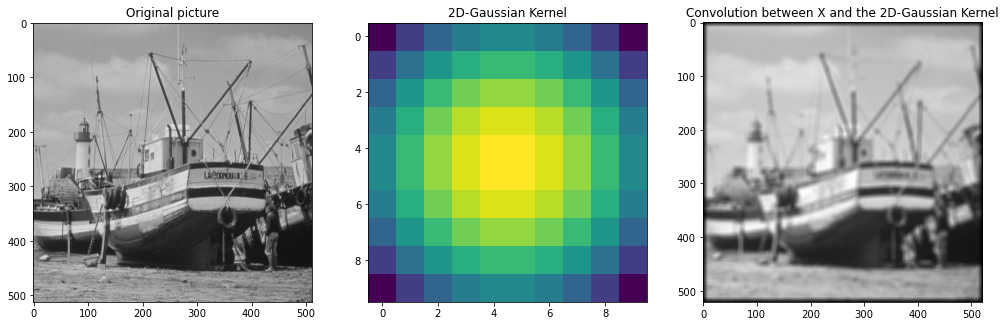

In [12]:
# your code
from scipy import signal
X = mpimg.imread('img/boat.png') # We select a picture

plt.figure(figsize=(17,17))

plt.subplot(1,3,1) # Plot of the original picture
plt.imshow(X,cmap ='gray')
plt.title('Original picture')

M1,N1 = X.shape[0], X.shape[1]
M2,N2 = 10, 10
M,N = M1 + M2 - 1, N1 + N2 - 1

# Initialization of the 2D Gaussian Kernel
Wy = signal.windows.gaussian(M2,10) 
Wx = signal.windows.gaussian(N2,10)

Wy = Wy[:,np.newaxis]
Wx = Wx[:,np.newaxis]

H = np.dot(Wy,Wx.T)

plt.subplot(1,3,2) # Plot of the 2D gaussian kernel
plt.imshow(H)
plt.title('2D-Gaussian Kernel')

# Case if X is a rgb or rgba matrix
if X.ndim == 3:
        X = X[:,:,0]

# Computing P1(X)
X = np.concatenate((X,np.zeros((M2-1,N1))))
X = np.concatenate((X.T,np.zeros((N2-1,M)))).T

# Computing P2(H)
H = np.concatenate((H,np.zeros((M1-1,N2))))
H = np.concatenate((H.T,np.zeros((N1-1,M)))).T

# Computing F(P1(X)) and F(P2(H))
X_fourier = np.fft.rfft2(X)
H_fourier = np.fft.rfft2(H)

# Hadamard product
Had = X_fourier*H_fourier

# Computing F^(-1)
conv = np.fft.irfft2(Had)

plt.subplot(1,3,3) # Plot of the convolution result
imgplot_conv = plt.imshow(conv, cmap='gray')
plt.title('Convolution between X and the 2D-Gaussian Kernel')

plt.show()


We observe that the result image is a bit blurred but also darkened in the borders.
Knowing that we need the values around the pixel to compute the convolution, it's normal to see that the pixels at the borders are black (since we have added values equals to 0 outside of the X matrix (M1,N1) -> (M,N)).
Since we compute a new pixel value thanks to its 99 nearest neighbors plus himself (10x10 Gaussian kernel), the result is of course blurred.